In [350]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline
import sys
sys.path.append ( "..")
import gp_emulator
sys.path.insert(0,'python')
from fastRWpkl import *
from scipy import interpolate
from nicer_plot import *
from readSent import *
import pandas as pd
from Py6S import *
import datetime
import time

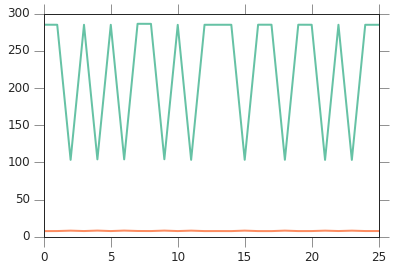

In [25]:
v = []
for i in glob.glob('data/50SMJ*metadata.xml'):
    senv = readxml(i)
    v.append([np.nanmean(senv['mVz']), np.nanmean(senv['mVa'])])
plt.plot(np.array(v))

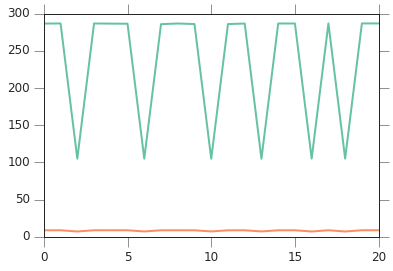

In [24]:
v = []
for i in glob.glob('data/50SMH*metadata.xml'):
    senv = readxml(i)
    v.append([np.nanmean(senv['mVz']), np.nanmean(senv['mVa'])])
plt.plot(v)

In [26]:
v

[[7.6608561259685031, 285.07088736710779],
 [7.7298682530853124, 285.00514083602786],
 [8.2637462555300427, 103.41968480621853],
 [7.7366436741155802, 284.97911818243387],
 [8.3434423026285227, 104.08030409380454],
 [7.7107033116103638, 284.9563682245842],
 [8.3501388332334283, 104.07710984665167],
 [7.8142085801351806, 286.29829427077527],
 [7.7338421175981811, 286.23612009096166],
 [8.3273106844425229, 104.22159101687957],
 [7.7082625345785578, 284.90613979725788],
 [8.280324542518871, 103.44856197392113],
 [7.6838877886177164, 284.97181941212557],
 [7.7185216550113163, 285.0007210478588],
 [7.6669992403884377, 284.98698078249191],
 [8.3028361622173108, 103.50258782035401],
 [7.6817381724869858, 285.07877023315825],
 [7.6656186780566316, 285.05877294311927],
 [8.3000626969510698, 103.5133631210274],
 [7.6919250328112634, 285.05714861558522],
 [7.7245847918139781, 285.00099004983372],
 [8.2649638014500777, 103.37768829943386],
 [7.7420011074241675, 285.00788358862951],
 [8.25080350063

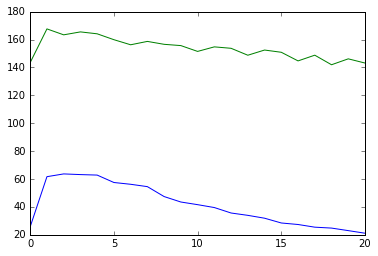

In [13]:
s = []
for i in glob.glob('data/50SMH*metadata.xml'):
    senv = readxml(i)
    s.append([np.nanmean(senv['mSz']), np.nanmean(senv['mSa'])])
plt.plot(s)

In [27]:
plot_config()

In [28]:
parameters = ['year', 'month', 'day','water', 'ozone']
min_vals = [2005, 1, 1, 0, 0.1, 0]
max_cals = [2016, 8, 10, 5, 1, 1]

In [23]:
s = SixS()

In [82]:
sen_rsp = pd.ExcelFile('sp_rep/Sentbands.xlsx')
swl = np.array(sen_rsp.parse('Spectral Responses')['SR_WL'])
cname= 'SR_AV_B2', 'SR_AV_B3', 'SR_AV_B4', 'SR_AV_B8', 'SR_AV_B8A', 'SR_AV_B11', 'SR_AV_B12'
path = '/home/ucfafyi/Downloads/6SV-1.1/6SV1.1/sixsV1.1'

In [157]:
def wp_6s(x, band=0):
    lat = 39.75389
    lon = 116.96194
    vz,va = 8, 105
    year, month,day,water,ozone, ref, rmin, rmax = x
    print ref
    
    doy = '%s/%s/%s'%(day, month, year)+' 10:30'
    print doy
    s = SixS(path)
    s.altitudes.set_target_sea_level()
    s.altitudes.set_sensor_satellite_level()
    
    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
    s.geometry = Geometry.User()
    s.geometry.from_time_and_location(lat, lon, doy, vz,va)
    #s.geometry.solar_a = 40
    #s.geometry.solar_z = 150
    #s.geometry.view_a = va
    #s.geometry.view_z = vz
    
    s.aeroprofile = AeroProfile.ModifiedGammaDistribution(rmin, rmax)
    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)

    #SixSHelpers.Aeronet.import_aeronet_data(s, '010101_161231_XiangHe.dubovik', doy)
    #s.atmos_profile = AtmosProfile.PredefinedType(AeroProfile.Urban)
    srsp = np.array(sen_rsp.parse('Spectral Responses')[cname[band]])
    wv, we = swl[srsp!=0]/1000.,srsp[srsp!=0]
    mi,ma = wv.min(),wv.max()
    print mi, ma
    f = interpolate.interp1d(wv,we)
    xnew = np.arange(mi,ma,0.0025)
    ynew = f(xnew)
    s.wavelength = Wavelength(mi, ma)
    s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromRadiance(137.5)
    s.run()
    return s.outputs.atmos_corrected_reflectance_lambertian

In [158]:
wp_6s([2006,2,4,2,0.318, 50], band=5)

50
4/2/2006 10:30
1.539 1.682


nan

In [ ]:
sixs_wavelengths = [0.350, 0.400, 0.412, 0.443, 0.470, 0.488, 0.515, 0.550, 0.590, 0.633, 0.670, 0.694, 0.760,
                            0.860, 1.240, 1.536, 1.650, 1.950, 2.250, 3.750]

In [284]:
a = open('010101_161231_XiangHe.dubovik', 'rb').read()

In [285]:
pas = a.split('\n')[3].split(',')[0:20]

In [286]:
pas

['Date(dd-mm-yyyy)',
 'Time(hh:mm:ss)',
 'Julian_Day',
 'AOT_1640',
 'AOT_1020',
 'AOT_870',
 'AOT_675',
 'AOT_667',
 'AOT_555',
 'AOT_551',
 'AOT_532',
 'AOT_531',
 'AOT_500',
 'AOT_490',
 'AOT_443',
 'AOT_440',
 'AOT_412',
 'AOT_380',
 'AOT_340',
 'Water(cm)']

In [290]:
df = pd.read_csv('010101_161231_XiangHe.dubovik', skiprows=3, na_values=["N/A"])

In [292]:
df[pas]

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
0,20:03:2001,07:37:20,79.317593,NaN,0.664567,0.682009,0.702073,NaN,NaN,NaN,NaN,NaN,0.743476,NaN,NaN,0.764322,NaN,0.798544,0.835823,0.751304
1,20:03:2001,08:37:11,79.359155,NaN,0.694707,0.714907,0.738892,NaN,NaN,NaN,NaN,NaN,0.779198,NaN,NaN,0.800057,NaN,0.831883,0.858109,0.745177
2,20:03:2001,09:04:10,79.377894,NaN,0.688250,0.708563,0.732161,NaN,NaN,NaN,NaN,NaN,0.771584,NaN,NaN,0.788625,NaN,0.820949,0.838799,0.727341
3,21:03:2001,00:04:40,80.003241,NaN,0.979982,1.024385,1.082995,NaN,NaN,NaN,NaN,NaN,1.157628,NaN,NaN,1.186611,NaN,1.233795,1.261821,0.616056
4,21:03:2001,01:04:15,80.044618,NaN,1.012791,1.060631,1.123776,NaN,NaN,NaN,NaN,NaN,1.207959,NaN,NaN,1.242639,NaN,1.283248,1.322274,0.645307
5,21:03:2001,03:21:47,80.140127,NaN,0.789208,0.839895,0.919414,NaN,NaN,NaN,NaN,NaN,1.038143,NaN,NaN,1.097797,NaN,1.169059,1.242092,0.698353
6,21:03:2001,06:21:47,80.265127,NaN,0.958180,1.022178,1.119758,NaN,NaN,NaN,NaN,NaN,1.258737,NaN,NaN,1.322392,NaN,1.409175,1.485222,0.755507
7,21:03:2001,07:21:45,80.306771,NaN,1.497995,1.543478,1.610199,NaN,NaN,NaN,NaN,NaN,1.715522,NaN,NaN,1.762051,NaN,1.839347,1.897884,0.864836
8,21:03:2001,07:38:45,80.318576,NaN,1.624919,1.665587,1.721542,NaN,NaN,NaN,NaN,NaN,1.809391,NaN,NaN,1.850932,NaN,1.919331,1.967008,0.851590
9,21:03:2001,23:36:06,80.983403,NaN,0.330304,0.335113,0.341631,NaN,NaN,NaN,NaN,NaN,0.367224,NaN,NaN,0.380702,NaN,0.403182,0.424596,0.339906


In [356]:
dates = [datetime.datetime.strptime(i, '%d:%m:%Y:%H:%M:%S') for i in (df['Date(dd-mm-yyyy)']+":"+df['Time(hh:mm:ss)'])]

In [24]:
lat = 39.75389
lon = 116.96194
vz,va = 8, 105
x  = [2006,2,4,2,0.2]
year, month,day,water,ozone = x

doy = '%s/%s/%s'%(day, month, year)+' 10:30'
s = SixS(path)
s.altitudes.set_target_sea_level
s.altitudes.set_sensor_satellite_level()

s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
s.geometry = Geometry.User()
s.geometry.from_time_and_location(lat, lon, doy, vz,va)
#SixSHelpers.Aeronet.import_aeronet_data(s, '010101_161231_XiangHe.dubovik', doy)
for i in range(len(cname)):
    srsp = np.array(sen_rsp.parse('Spectral Responses')[cname[0]])
    wv, we = swl[srsp!=0]/1000.,srsp[srsp!=0]
    mi,ma = wv.min(),wv.max()
    print mi, ma
    s.wavelength = Wavelength(mi, ma, we)
    s.run()
    break

0.44 0.538


In [25]:
s.outputs.apparent_reflectance

nan

In [357]:
s=SixS(path)
# Instantiate the class
s.aero_profile=AeroProfile.PredefinedType(AeroProfile.Maritime)
# Set various parameters
srsp = np.array(sen_rsp.parse('Spectral Responses')[cname[0]])
wv, we = swl[srsp!=0]/1000.,srsp[srsp!=0]
mi,ma = wv.min(),wv.max()
s.altitudes.set_target_sea_level
s.altitudes.set_sensor_satellite_level()
s.wavelength=Wavelength(mi,ma)
SixSHelpers.Aeronet.import_aeronet_data(s, '010101_161231_XiangHe.dubovik', doy)
s.geometry.solar_a = 40
s.geometry.solar_z = 150
s.geometry.view_a = va
s.geometry.view_z = vz
s.atmos_corr=AtmosCorr.AtmosCorrLambertianFromReflectance(0.1)
s.run()

In [358]:
s.outputs.atmos_corrected_reflectance_lambertian

0.87722